# REQUIREMENTS USED DURING THIS PRODUCTION

In [1]:
#Python library that is used for data analysis
import pandas as pd
#NumPy is a python library used for working with arrays
import numpy as np
#matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
#Python data visualization library based on matplotlib
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Panda library used for reating data from yahoo finance
from pandas_datareader.data import DataReader

# This is used to import and parse time stamp
from datetime import datetime

# TECH LIST

In [2]:
# tech_list is the list of stocks that we will use to analyse our problem statement. It consists of aaple as AAPL, google as GOOG, microsoft as MSFT and amazon as AMZN
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setting up end time, which is our current data
end = datetime.now()
# Setting up start time, which is our old data 
start = datetime(end.year - 1, end.month, end.day)

# The for loop used below is used for setting up dataframe and grabbing data from yahoo finance
for stock in tech_list:   
    # Here we are setting up dataframe as the Stockticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600.0,3102.969971,AMAZON
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500.0,3156.129883,AMAZON
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200.0,3078.100098,AMAZON
2020-09-17,3029.429932,2972.550049,3009.250000,3008.729980,6449100.0,3008.729980,AMAZON
2020-09-18,3037.800049,2905.540039,3031.739990,2954.909912,8892600.0,2954.909912,AMAZON
2020-09-21,2962.000000,2871.000000,2906.500000,2960.469971,6117900.0,2960.469971,AMAZON
2020-09-22,3133.989990,3000.199951,3033.840088,3128.989990,6948800.0,3128.989990,AMAZON
2020-09-23,3127.000000,2992.379883,3120.429932,2999.860107,5652700.0,2999.860107,AMAZON
2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400.0,3019.790039,AMAZON


In [4]:
# here we are using apple dataframe and checking whether if we are getting our desired output or not.
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,81.389380,79.191575,80.255659,80.386368,1.359346e+08,80.077352
std,19.213695,18.330438,18.962345,18.754252,5.555966e+07,18.906344
min,55.235001,53.152500,54.607498,54.705002,4.661760e+07,54.167561
25%,66.891874,65.626249,66.016253,66.459377,9.663470e+07,66.017677
50%,77.211250,75.437500,75.996250,76.919998,1.255824e+08,76.672298
75%,91.453753,89.330626,90.784378,90.881872,1.655311e+08,90.718307
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [5]:
# using this we can get the basic info regarding apple's high, low, open etc.
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-25 to 2020-09-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


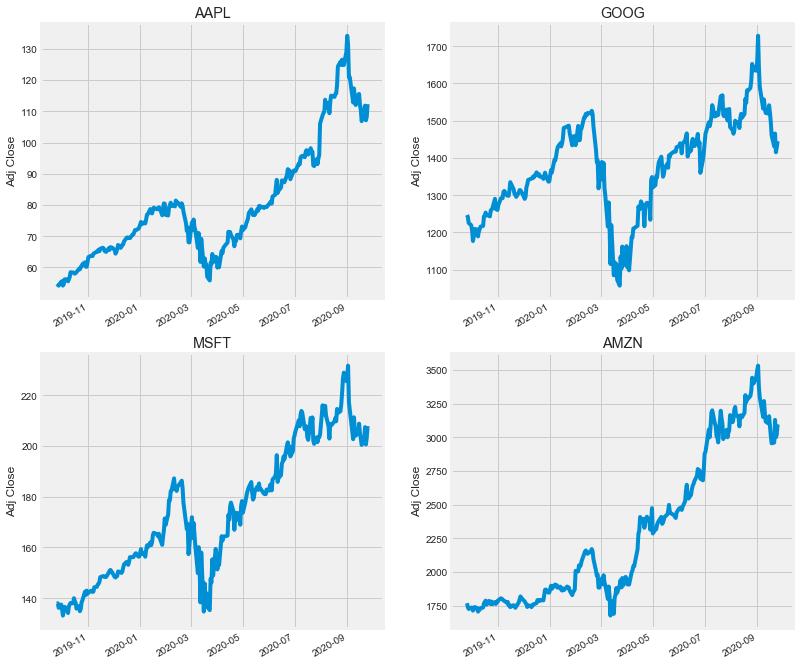

In [6]:
# in the following code we are presenting a historical view of the closing price on the basis of adj close values
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

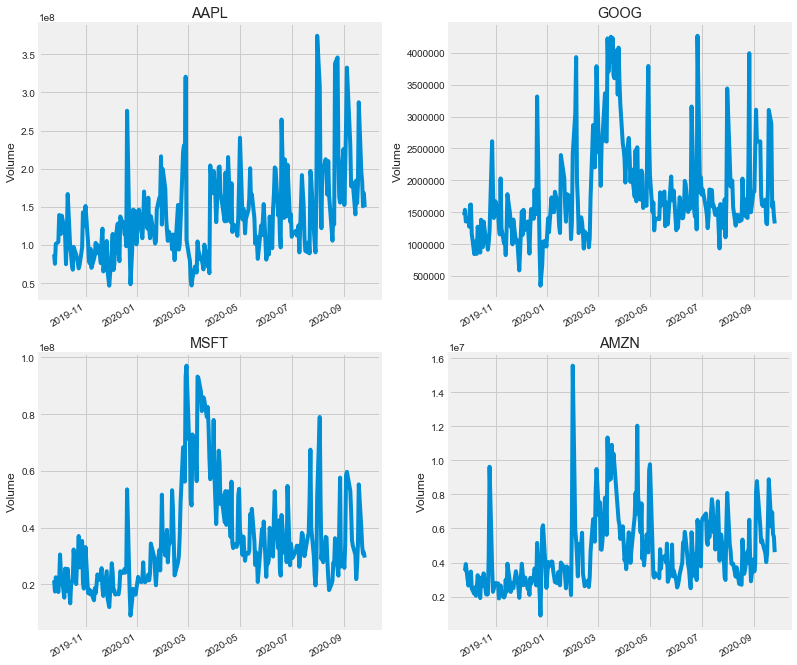

In [7]:
# the following graphs shows the volume per day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# MOVING AVERAGE ALGORITHM

In [8]:
# this step is used for setting up moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [9]:
# this step is used to check the parameters 
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


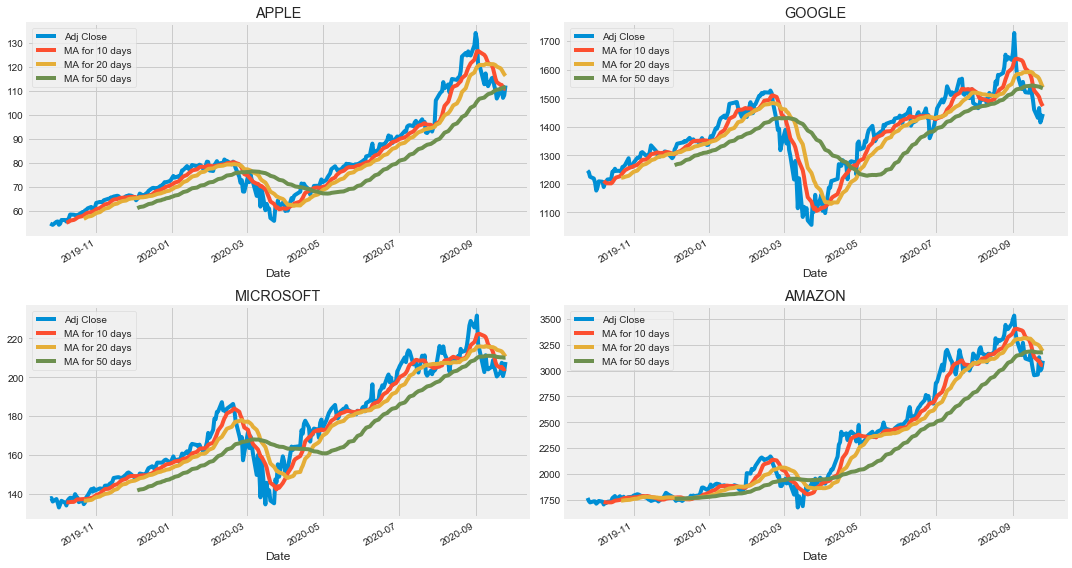

In [10]:
# the following graph si used to set up and make graph for moving average for 10 days, 20 days and 50 days.
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

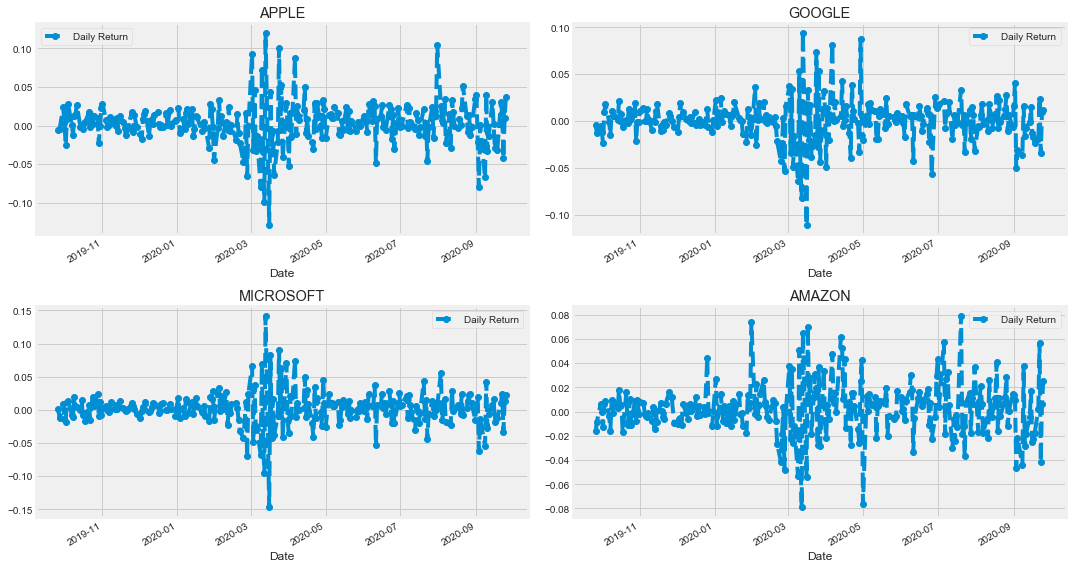

In [11]:
# we'll use the function, pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# the following graph shows daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [12]:
# we have to now grap all the closing price for the tech stock into one data frame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,54.714626,1246.520020,137.791306,1768.329956
2019-09-26,54.432430,1241.390015,137.969284,1739.839966
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024


In [13]:
# here we are creating a new tech return data dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,NaN,NaN,NaN,NaN
2019-09-26,-0.005158,-0.004115,0.001292,-0.016111
2019-09-27,-0.004866,-0.013130,-0.012971,-0.008271
2019-09-30,0.023535,-0.004971,0.009439,0.006062
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150


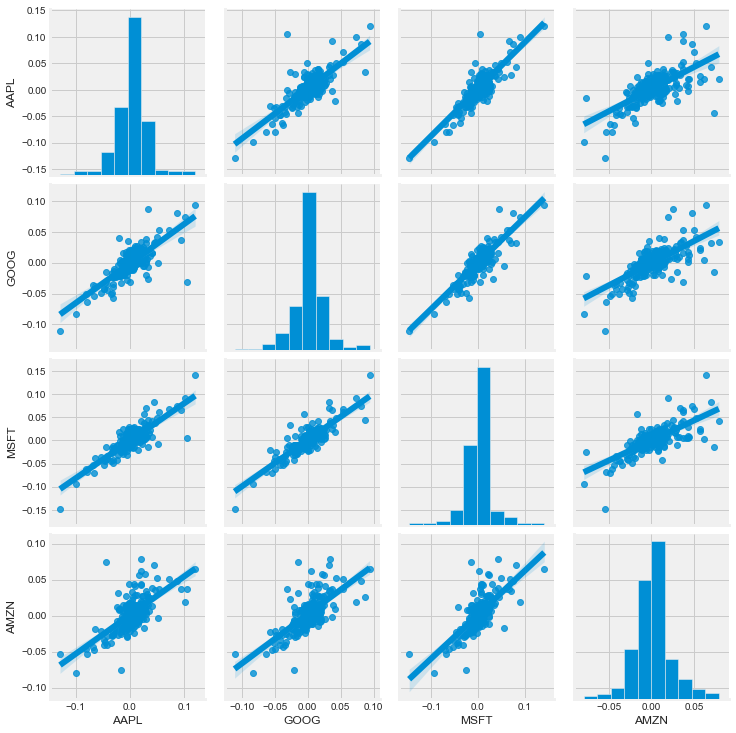

In [14]:
# pair plot is just an addition which will simply call our dataframe for an automatic visual analysis
sns.pairplot(tech_rets, kind='reg')


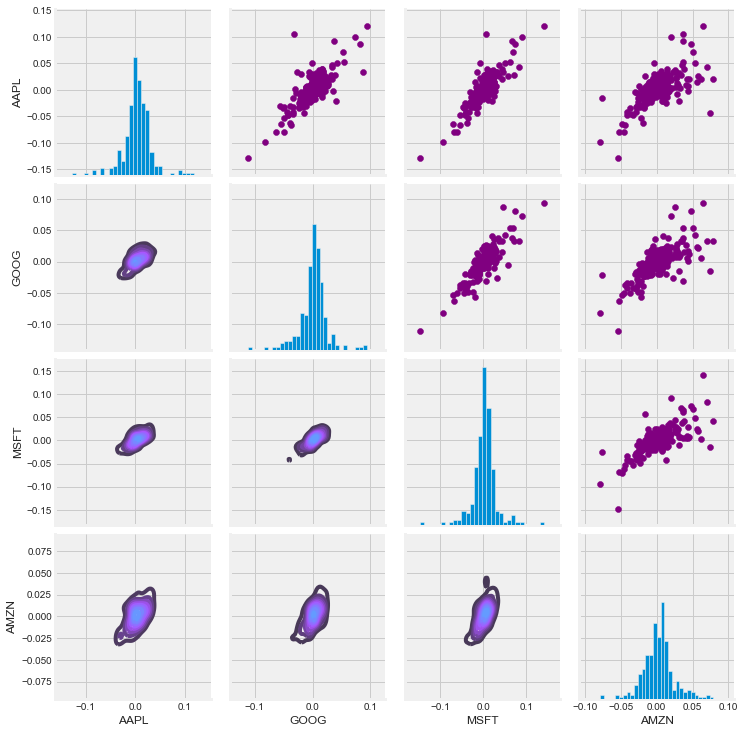

In [15]:
# here we are setting up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# we can also define the lower triangle in the figure, including the plot type 
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

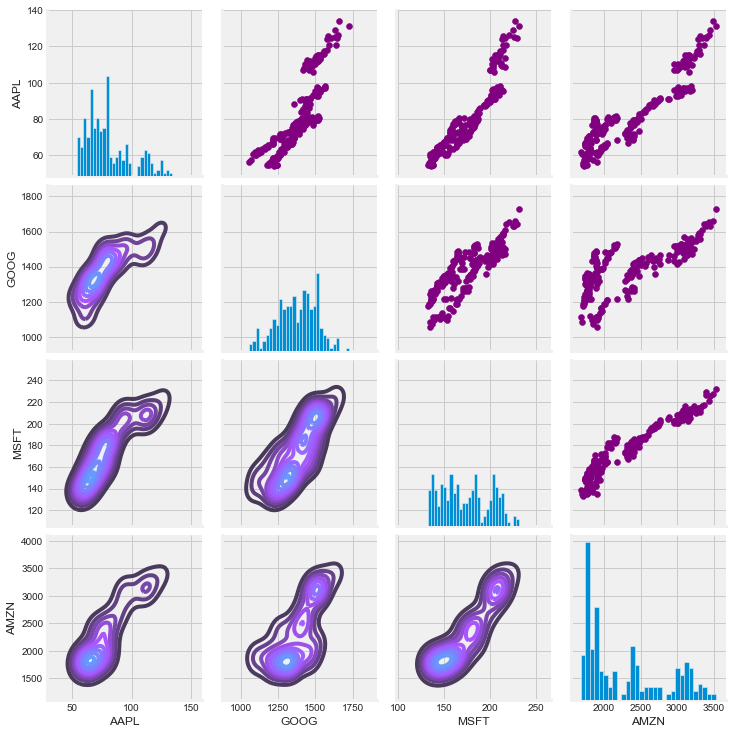

In [16]:
# here we are setting up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# we can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


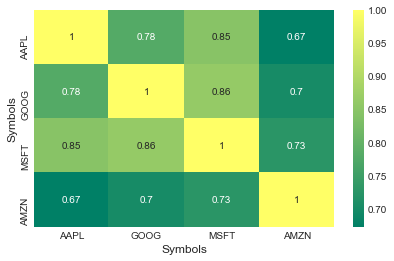

In [17]:
# using seahorn we are implementing correlation
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

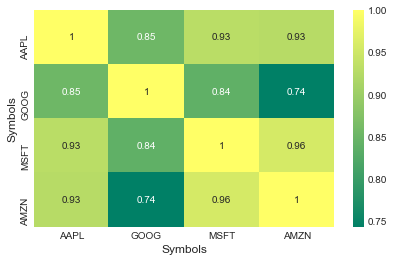

In [18]:
# using seahorn we are implementing correlation
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# LET'S START PREDICTING APPLE STOCK PRICE

In [19]:
# to get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2019-08-25', end=datetime.now())
#to show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,51.797501,51.264999,51.465000,51.622501,104174400.0,51.115337
2019-08-27,52.137501,50.882500,51.965000,51.040001,103493200.0,50.538563
2019-08-28,51.430000,50.830002,51.025002,51.382500,63755200.0,50.877701
2019-08-29,52.330002,51.665001,52.125000,52.252499,83962000.0,51.739151
2019-08-30,52.612499,51.799999,52.540001,52.185001,84573600.0,51.672314
...,...,...,...,...,...,...
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003


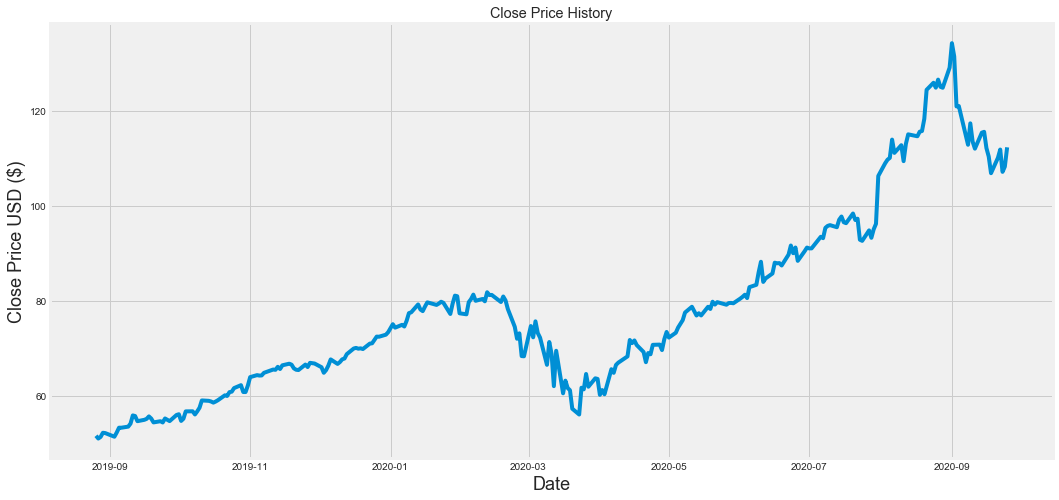

In [20]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# here we are converting the dataframe into numpy array
dataset = data.values
# count the number of rows which will be used to train the model
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

220

In [22]:
# here we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00700626],
       [0.        ],
       [0.00411954],
       [0.01458381],
       [0.01377196],
       [0.00463072],
       [0.01512509],
       [0.02742361],
       [0.02736346],
       [0.03009982],
       [0.03770746],
       [0.05842553],
       [0.05692204],
       [0.04387178],
       [0.04732978],
       [0.04973537],
       [0.05595983],
       [0.05051721],
       [0.04080465],
       [0.04378157],
       [0.04065429],
       [0.05072768],
       [0.04729973],
       [0.04408229],
       [0.0595682 ],
       [0.06143251],
       [0.04450326],
       [0.05009624],
       [0.06870939],
       [0.06885974],
       [0.06086117],
       [0.06876954],
       [0.07797088],
       [0.09637361],
       [0.0953512 ],
       [0.0936974 ],
       [0.09084073],
       [0.09357709],
       [0.09697499],
       [0.10930357],
       [0.10764977],
       [0.11733219],
       [0.11853501],
       [0.12755594],
       [0.13498317],
       [0.11766296],
       [0.11757275],
       [0.134

In [23]:
# here we will create the training data set and then create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

#here we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# in the below code we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# here we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00700626, 0.        , 0.00411954, 0.01458381, 0.01377196,
       0.00463072, 0.01512509, 0.02742361, 0.02736346, 0.03009982,
       0.03770746, 0.05842553, 0.05692204, 0.04387178, 0.04732978,
       0.04973537, 0.05595983, 0.05051721, 0.04080465, 0.04378157,
       0.04065429, 0.05072768, 0.04729973, 0.04408229, 0.0595682 ,
       0.06143251, 0.04450326, 0.05009624, 0.06870939, 0.06885974,
       0.06086117, 0.06876954, 0.07797088, 0.09637361, 0.0953512 ,
       0.0936974 , 0.09084073, 0.09357709, 0.09697499, 0.10930357,
       0.10764977, 0.11733219, 0.11853501, 0.12755594, 0.13498317,
       0.11766296, 0.11757275, 0.13411112, 0.15534042, 0.16039211,
       0.15927955, 0.15961027, 0.16619556, 0.16833058, 0.17452494,
       0.1738032 , 0.18135074, 0.17584802, 0.18522977, 0.18925911])]
[0.1868234635564232]

[array([0.00700626, 0.        , 0.00411954, 0.01458381, 0.01377196,
       0.00463072, 0.01512509, 0.02742361, 0.02736346, 0.03009982,
       0.03770746, 0.05842553, 0.056

In [24]:
# here we are installing all the requirements for using LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# building up the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we have trained the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

160/160 [==============================] - 3s 16ms/step - loss: 0.0048


In [25]:
# here we are creating the testing data set
# here we are creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# here we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# here we are converting the data to a numpy array
x_test = np.array(x_test)

# here we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# in the codes below we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# in the codes below we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.305756677931648

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


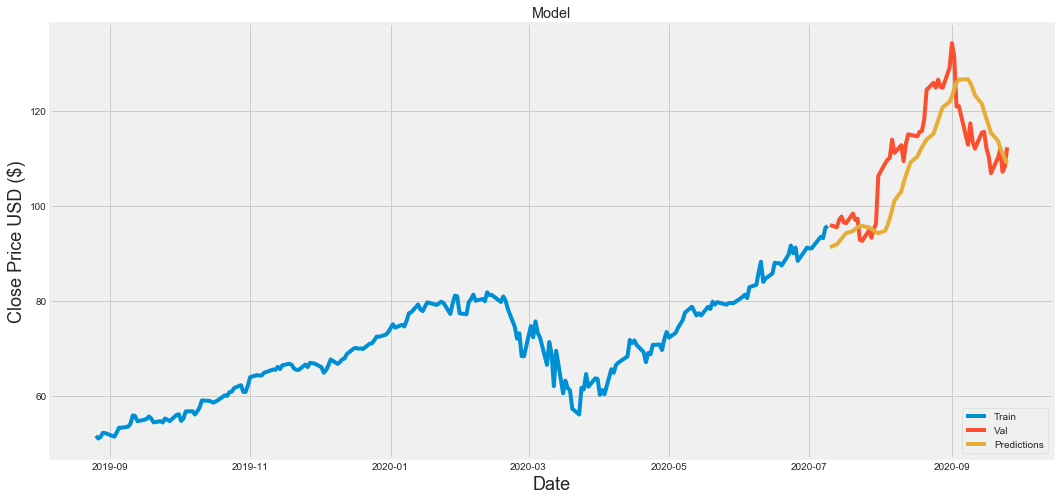

In [26]:
# in the following code the we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# here shows the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-10,95.919998,91.259743
2020-07-13,95.477501,91.876251
2020-07-14,97.057503,92.451836
2020-07-15,97.724998,93.058556
2020-07-16,96.522499,93.689354
2020-07-17,96.327499,94.228706
2020-07-20,98.357498,94.662193
2020-07-21,97.000000,95.116074
2020-07-22,97.272499,95.475121


# LET'S START PREDICTING GOOGLE STOCK PRICE

In [28]:
# to get the stock quote
df = DataReader('GOOG', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1169.469971,1152.959961,1157.260010,1168.890015,1226100,1168.890015
2019-08-27,1182.400024,1161.449951,1180.530029,1167.839966,1077200,1167.839966
2019-08-28,1176.420044,1157.300049,1161.709961,1171.020020,802000,1171.020020
2019-08-29,1196.060059,1181.119995,1181.119995,1192.849976,1088400,1192.849976
2019-08-30,1198.500000,1183.802979,1198.500000,1188.099976,1129800,1188.099976
...,...,...,...,...,...,...
2020-09-21,1448.359985,1406.550049,1440.060059,1431.160034,2888800,1431.160034
2020-09-22,1469.520020,1434.530029,1450.089966,1465.459961,1583200,1465.459961
2020-09-23,1460.959961,1407.699951,1458.780029,1415.209961,1657400,1415.209961


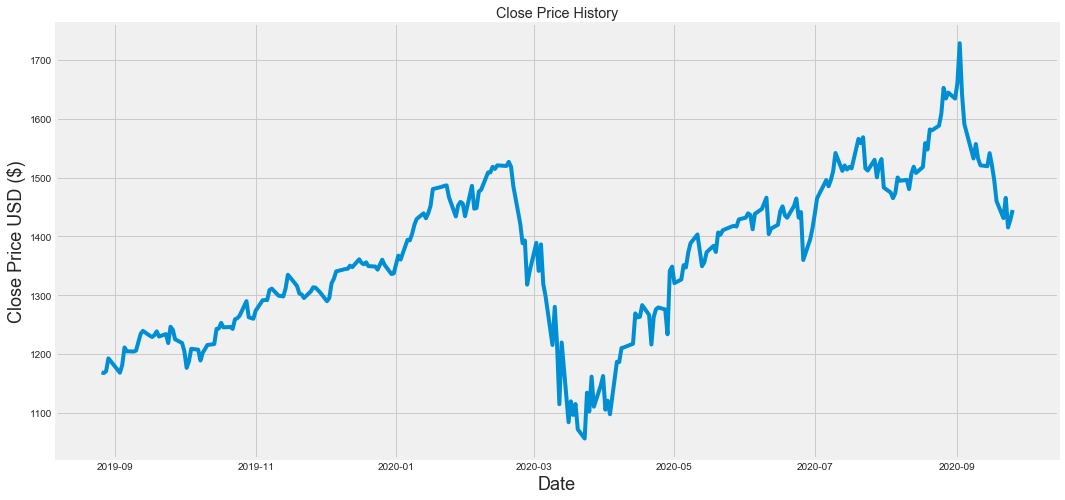

In [29]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# here we are converting the dataframe into numpy array
dataset = data.values
# count the number of rows which will be used to train the model
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

220

In [31]:
# here we will scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16715304],
       [0.16558968],
       [0.1703243 ],
       [0.2028258 ],
       [0.19575376],
       [0.16640862],
       [0.18579346],
       [0.2304142 ],
       [0.2208112 ],
       [0.22003697],
       [0.22240419],
       [0.24350124],
       [0.26446416],
       [0.27237003],
       [0.26007213],
       [0.25687107],
       [0.26172473],
       [0.27110436],
       [0.25803241],
       [0.26413665],
       [0.24140191],
       [0.28273236],
       [0.27509456],
       [0.25082625],
       [0.24175922],
       [0.22106419],
       [0.17867672],
       [0.19535175],
       [0.22687073],
       [0.22490553],
       [0.19728732],
       [0.21691043],
       [0.22637948],
       [0.23647373],
       [0.23898998],
       [0.27750648],
       [0.27844447],
       [0.29248421],
       [0.2811988 ],
       [0.28218149],
       [0.27719388],
       [0.30150671],
       [0.30427595],
       [0.3104398 ],
       [0.34746746],
       [0.30670278],
       [0.30472268],
       [0.302

In [32]:
# here we will create the training data set
# here we will create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# in the below code we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# here we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# here we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16715304, 0.16558968, 0.1703243 , 0.2028258 , 0.19575376,
       0.16640862, 0.18579346, 0.2304142 , 0.2208112 , 0.22003697,
       0.22240419, 0.24350124, 0.26446416, 0.27237003, 0.26007213,
       0.25687107, 0.26172473, 0.27110436, 0.25803241, 0.26413665,
       0.24140191, 0.28273236, 0.27509456, 0.25082625, 0.24175922,
       0.22106419, 0.17867672, 0.19535175, 0.22687073, 0.22490553,
       0.19728732, 0.21691043, 0.22637948, 0.23647373, 0.23898998,
       0.27750648, 0.27844447, 0.29248421, 0.2811988 , 0.28218149,
       0.27719388, 0.30150671, 0.30427595, 0.3104398 , 0.34746746,
       0.30670278, 0.30472268, 0.30296576, 0.32325877, 0.34950717,
       0.35048986, 0.35014746, 0.37554712, 0.37928414, 0.36114989,
       0.3605694 , 0.35937825, 0.37941809, 0.41427208, 0.39317503])]
[0.3853734815954015]

[array([0.16715304, 0.16558968, 0.1703243 , 0.2028258 , 0.19575376,
       0.16640862, 0.18579346, 0.2304142 , 0.2208112 , 0.22003697,
       0.22240419, 0.24350124, 0.264

In [33]:
# these are the set of requirements 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# here we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

160/160 [==============================] - 2s 15ms/step - loss: 0.0136


In [34]:
# in this step we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# in this step we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# here we are converting the data to a numpy array
x_test = np.array(x_test)

# here we will be reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# here we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# here we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

81.58678621910146

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


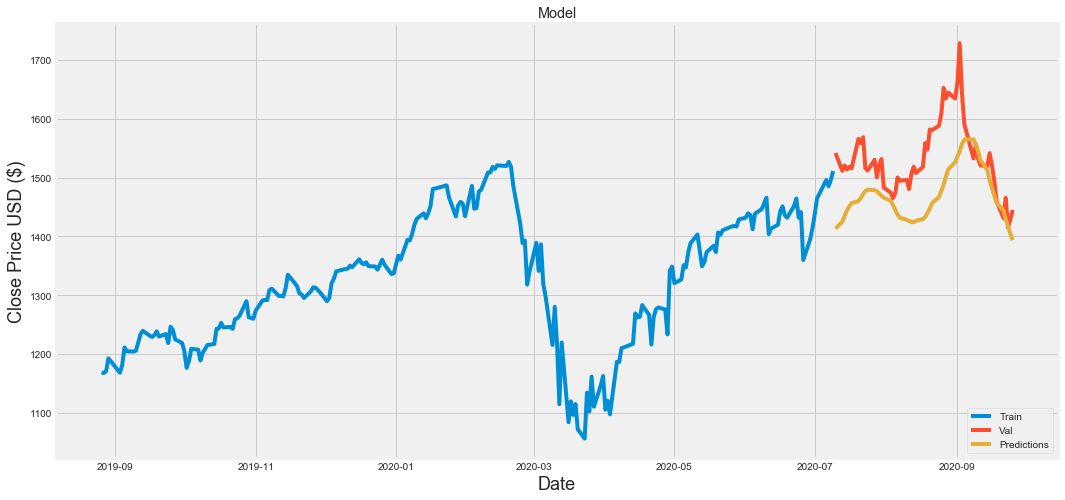

In [35]:
# we would be plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# we would be visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-10,1541.739990,1413.283569
2020-07-13,1511.339966,1425.065796
2020-07-14,1520.579956,1435.205933
2020-07-15,1513.640015,1444.176758
2020-07-16,1518.000000,1451.141602
2020-07-17,1515.550049,1456.506592
2020-07-20,1565.719971,1460.158325
2020-07-21,1558.420044,1465.726318
2020-07-22,1568.489990,1471.405396


# LET'S START PREDICTING MICROSOFT STOCK PRICE

In [37]:
# here we are getting the stock quote
df = DataReader('MSFT', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,135.559998,133.899994,134.990005,135.449997,20312600.0,133.925323
2019-08-27,136.720001,134.660004,136.389999,135.740005,23102100.0,134.212051
2019-08-28,135.759995,133.550003,134.880005,135.559998,17393300.0,134.034073
2019-08-29,138.440002,136.910004,137.250000,138.119995,20168700.0,136.565262
2019-08-30,139.179993,136.270004,139.149994,137.860001,23940100.0,136.308212
...,...,...,...,...,...,...
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998
2020-09-23,208.100006,200.029999,207.899994,200.589996,30803800.0,200.589996


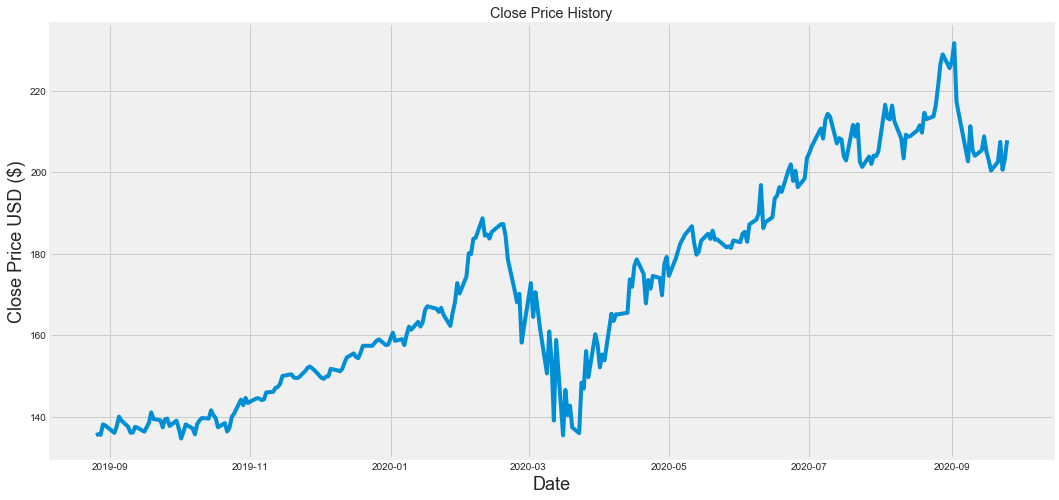

In [38]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# we are converting the dataframe to a numpy array
dataset = data.values
# we are getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

220

In [40]:
# we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00824745],
       [0.01123723],
       [0.00938148],
       [0.03577321],
       [0.03309285],
       [0.01432989],
       [0.03072176],
       [0.0556702 ],
       [0.04587641],
       [0.02958774],
       [0.01474235],
       [0.01515465],
       [0.02958774],
       [0.02752591],
       [0.01731967],
       [0.02824748],
       [0.03989701],
       [0.06618571],
       [0.04938153],
       [0.04628872],
       [0.02814444],
       [0.04855677],
       [0.05041236],
       [0.0317526 ],
       [0.04515469],
       [0.02494859],
       [0.        ],
       [0.01680417],
       [0.03577321],
       [0.02546393],
       [0.01051551],
       [0.03701043],
       [0.04587641],
       [0.05185566],
       [0.05051556],
       [0.07134034],
       [0.05938154],
       [0.05195885],
       [0.02845371],
       [0.03896906],
       [0.01773197],
       [0.02670115],
       [0.05453617],
       [0.06268043],
       [0.0983506 ],
       [0.08432998],
       [0.10268048],
       [0.089

In [41]:
# here we are creating the training data set and the scaled data
train_data = scaled_data[0:int(training_data_len), :]
# we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00824745, 0.01123723, 0.00938148, 0.03577321, 0.03309285,
       0.01432989, 0.03072176, 0.0556702 , 0.04587641, 0.02958774,
       0.01474235, 0.01515465, 0.02958774, 0.02752591, 0.01731967,
       0.02824748, 0.03989701, 0.06618571, 0.04938153, 0.04628872,
       0.02814444, 0.04855677, 0.05041236, 0.0317526 , 0.04515469,
       0.02494859, 0.        , 0.01680417, 0.03577321, 0.02546393,
       0.01051551, 0.03701043, 0.04587641, 0.05185566, 0.05051556,
       0.07134034, 0.05938154, 0.05195885, 0.02845371, 0.03896906,
       0.01773197, 0.02670115, 0.05453617, 0.06268043, 0.0983506 ,
       0.08432998, 0.10268048, 0.08989692, 0.09350523, 0.10206195,
       0.10113415, 0.09701035, 0.09907217, 0.11659807, 0.1181444 ,
       0.12804138, 0.1305155 , 0.13824746, 0.15793822, 0.1617526 ])]
[0.1622680978676707]

[array([0.00824745, 0.01123723, 0.00938148, 0.03577321, 0.03309285,
       0.01432989, 0.03072176, 0.0556702 , 0.04587641, 0.02958774,
       0.01474235, 0.01515465, 0.029

In [42]:
# here we are imporinting the requirements required to run LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#  we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we would train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

160/160 [==============================] - 2s 15ms/step - loss: 0.0126


In [43]:
# we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# here we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# we are converting the data to a numpy array
x_test = np.array(x_test)

# here we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# here we are geting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# here we are geting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.3774296400849835

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


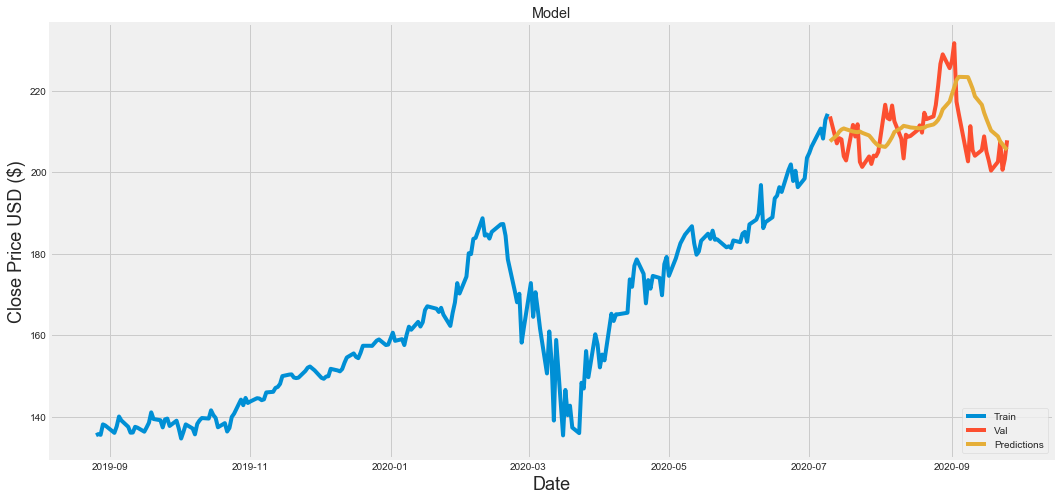

In [44]:
# here we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# here we are visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
# showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-10,213.669998,207.579529
2020-07-13,207.070007,209.050537
2020-07-14,208.350006,209.919388
2020-07-15,208.039993,210.461563
2020-07-16,203.919998,210.732025
2020-07-17,202.880005,210.532562
2020-07-20,211.600006,209.995438
2020-07-21,208.750000,209.879883
2020-07-22,211.750000,209.806564


# LET'S START PREDICTING AMAZON STOCK PRICE

In [46]:
# here we are getting the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1770.000000,1743.510010,1766.910034,1768.869995,3080000,1768.869995
2019-08-27,1779.400024,1746.680054,1775.729980,1761.829956,3019700,1761.829956
2019-08-28,1767.859985,1744.050049,1755.000000,1764.250000,2419700,1764.250000
2019-08-29,1798.550049,1777.250000,1783.000000,1786.400024,3015100,1786.400024
2019-08-30,1799.739990,1764.569946,1797.489990,1776.290039,3058700,1776.290039
...,...,...,...,...,...,...
2020-09-21,2962.000000,2871.000000,2906.500000,2960.469971,6117900,2960.469971
2020-09-22,3133.989990,3000.199951,3033.840088,3128.989990,6948800,3128.989990
2020-09-23,3127.000000,2992.379883,3120.429932,2999.860107,5652700,2999.860107


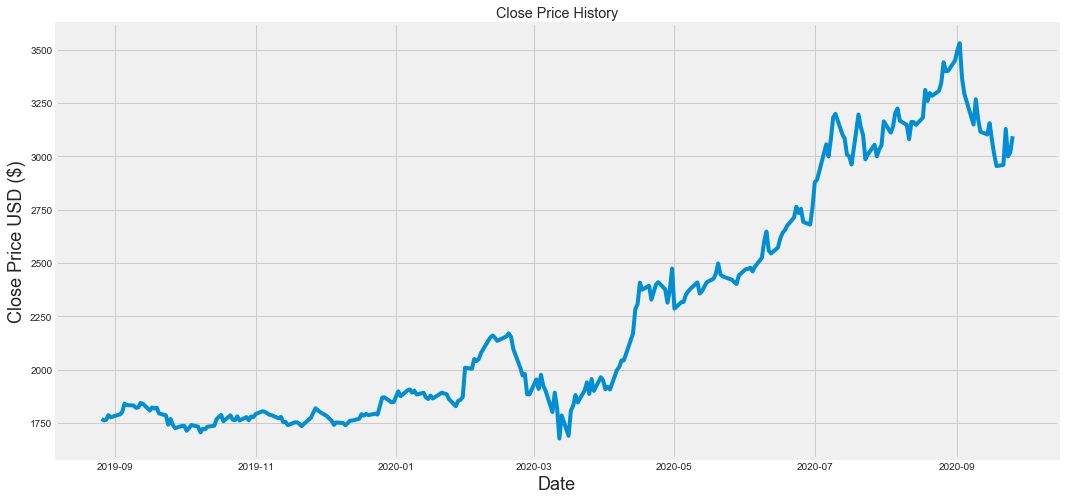

In [47]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [48]:
# here we are creating a new dataframe with only the 'Close column
data = df.filter(['Close'])
# her we are converting the dataframe to a numpy array
dataset = data.values
# here we are getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

220

In [49]:
# here we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04974015],
       [0.04594465],
       [0.04724937],
       [0.05919111],
       [0.05374051],
       [0.06104569],
       [0.06685753],
       [0.08847663],
       [0.08458952],
       [0.08342498],
       [0.07760242],
       [0.07891786],
       [0.09000241],
       [0.08773263],
       [0.07075003],
       [0.07868068],
       [0.07593646],
       [0.07811456],
       [0.06337477],
       [0.05859808],
       [0.03504345],
       [0.04944899],
       [0.03408918],
       [0.02633109],
       [0.03197044],
       [0.03183026],
       [0.01974294],
       [0.02577584],
       [0.03398678],
       [0.03021827],
       [0.01558087],
       [0.02446573],
       [0.02353304],
       [0.02981932],
       [0.0322508 ],
       [0.04893685],
       [0.05435513],
       [0.05977335],
       [0.04361564],
       [0.05879216],
       [0.04804727],
       [0.046128  ],
       [0.0561612 ],
       [0.04567508],
       [0.05416638],
       [0.04641909],
       [0.05573527],
       [0.053

In [50]:
# here we are creating the training data set
# here we are creating the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# here we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04974015, 0.04594465, 0.04724937, 0.05919111, 0.05374051,
       0.06104569, 0.06685753, 0.08847663, 0.08458952, 0.08342498,
       0.07760242, 0.07891786, 0.09000241, 0.08773263, 0.07075003,
       0.07868068, 0.07593646, 0.07811456, 0.06337477, 0.05859808,
       0.03504345, 0.04944899, 0.03408918, 0.02633109, 0.03197044,
       0.03183026, 0.01974294, 0.02577584, 0.03398678, 0.03021827,
       0.01558087, 0.02446573, 0.02353304, 0.02981932, 0.0322508 ,
       0.04893685, 0.05435513, 0.05977335, 0.04361564, 0.05879216,
       0.04804727, 0.046128  , 0.0561612 , 0.04567508, 0.05416638,
       0.04641909, 0.05573527, 0.05393999, 0.06190828, 0.06903563,
       0.06744516, 0.06424276, 0.06016151, 0.05891075, 0.05123894,
       0.05466241, 0.04124345, 0.04204675, 0.0339005 , 0.04093078])]
[0.04107095766466651]

[array([0.04974015, 0.04594465, 0.04724937, 0.05919111, 0.05374051,
       0.06104569, 0.06685753, 0.08847663, 0.08458952, 0.08342498,
       0.07760242, 0.07891786, 0.09

In [51]:
# following are the requirements which would be required by LSTM model 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# here we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compilin the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

160/160 [==============================] - 2s 15ms/step - loss: 0.0074


In [52]:
# we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# we are converting the data to a numpy array
x_test = np.array(x_test)

# we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#  we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

244.4901891304842

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


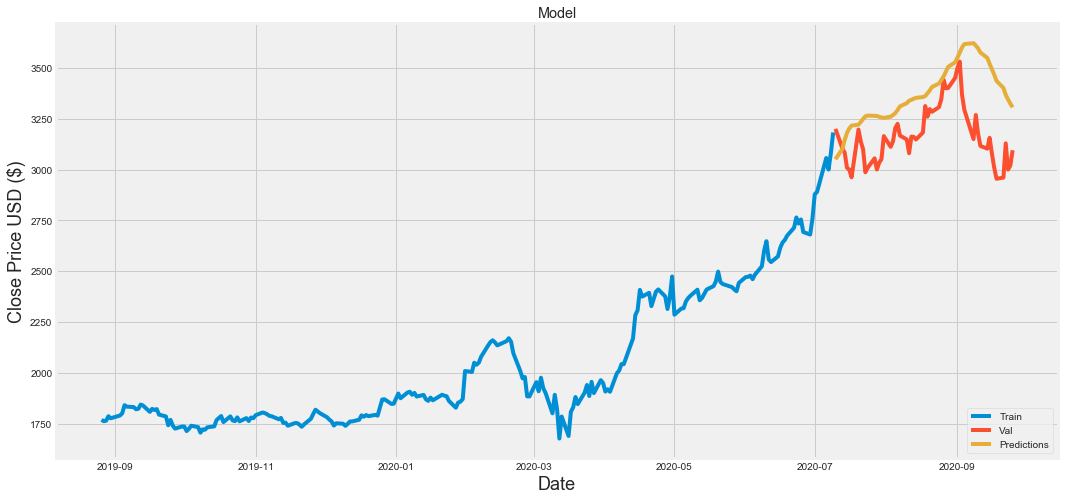

In [53]:
# we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# we are visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [54]:
# showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-10,3200.000000,3050.939697
2020-07-13,3104.000000,3101.759521
2020-07-14,3084.000000,3145.169189
2020-07-15,3008.870117,3180.009521
2020-07-16,2999.899902,3202.865479
2020-07-17,2961.969971,3216.325195
2020-07-20,3196.840088,3220.934570
2020-07-21,3138.290039,3234.231934
2020-07-22,3099.909912,3249.125488
